In [1]:
%matplotlib inline
import math
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm
import seaborn as sns
import sqlite3

import sys
sys.path.append('..')

from database import Database, ItemsExtracted, ItemRecord
from map import maps, standard_maps

item_names = ['freeze', 'grappling', 'plunger', 'haymaker', 'spikes', 'disruptor', 'boot', 'magnet', 'power', 'swapper', 'tornado']
ranks = list(range(1, 20))
db = Database('D:\\rumble_replays')

inferno_cmap = copy.copy(plt.cm.get_cmap('inferno')) # copy the default cmap
inferno_cmap.set_bad((0,0,0.0156862745))

In [2]:
df = pd.read_sql_query(sql='SELECT item, count(*) as count FROM item WHERE is_kickoff = 1 GROUP BY item', con=db.engine)
df['name'] = item_names
df

,item,count,name
0,1,547124,freeze
1,2,545217,grappling
2,3,542212,plunger
3,4,543781,haymaker
4,5,541632,spikes
5,6,543746,disruptor
6,7,544723,boot
7,8,543784,magnet
8,9,544587,power
9,10,543798,swapper


In [3]:
maps_s9_df = pd.read_sql_query(sql='SELECT map, count(*) as count FROM items_extracted WHERE match_date > \'2018-09-24 00:00:00\' AND match_date < \'2019-02-19 00:00:00\' GROUP BY map', con=db.engine)
maps_s9_df['season'] = 9

maps_s10_df = pd.read_sql_query(sql='SELECT map, count(*) as count FROM items_extracted WHERE match_date > \'2019-02-19 00:00:00\' AND match_date < \'2019-05-13 00:00:00\' GROUP BY map', con=db.engine)
maps_s10_df['season'] = 10

maps_s11_df = pd.read_sql_query(sql='SELECT map, count(*) as count FROM items_extracted WHERE match_date > \'2019-05-13 00:00:00\' AND match_date < \'2019-08-27 00:00:00\' GROUP BY map', con=db.engine)
maps_s11_df['season'] = 11

maps_s12_df = pd.read_sql_query(sql='SELECT map, count(*) as count FROM items_extracted WHERE match_date > \'2019-08-27 00:00:00\' AND match_date < \'2019-12-04 00:00:00\' GROUP BY map', con=db.engine)
maps_s12_df['season'] = 12

maps_df = pd.concat([maps_s9_df, maps_s10_df, maps_s11_df, maps_s12_df])
maps_df = pd.pivot_table(maps_df, values='count', index='map', columns='season', fill_value=0)
maps_df['map_name'] = list(map(lambda x: maps[x], maps_df.index))
maps_df

season,9,10,11,12,map_name
map,,,,,
0,687,742,1092,1286,ARC_P
1,939,975,1524,1955,arc_standard_p
2,1291,1402,2174,2719,beach_P
4,776,869,1337,1543,cs_day_p
5,1229,2115,1975,2153,cs_p
6,582,617,876,1033,EuroStadium_Night_P
7,896,1736,1433,1510,EuroStadium_P
8,588,643,912,1076,EuroStadium_Rainy_P
10,0,0,0,362,Farm_Night_P


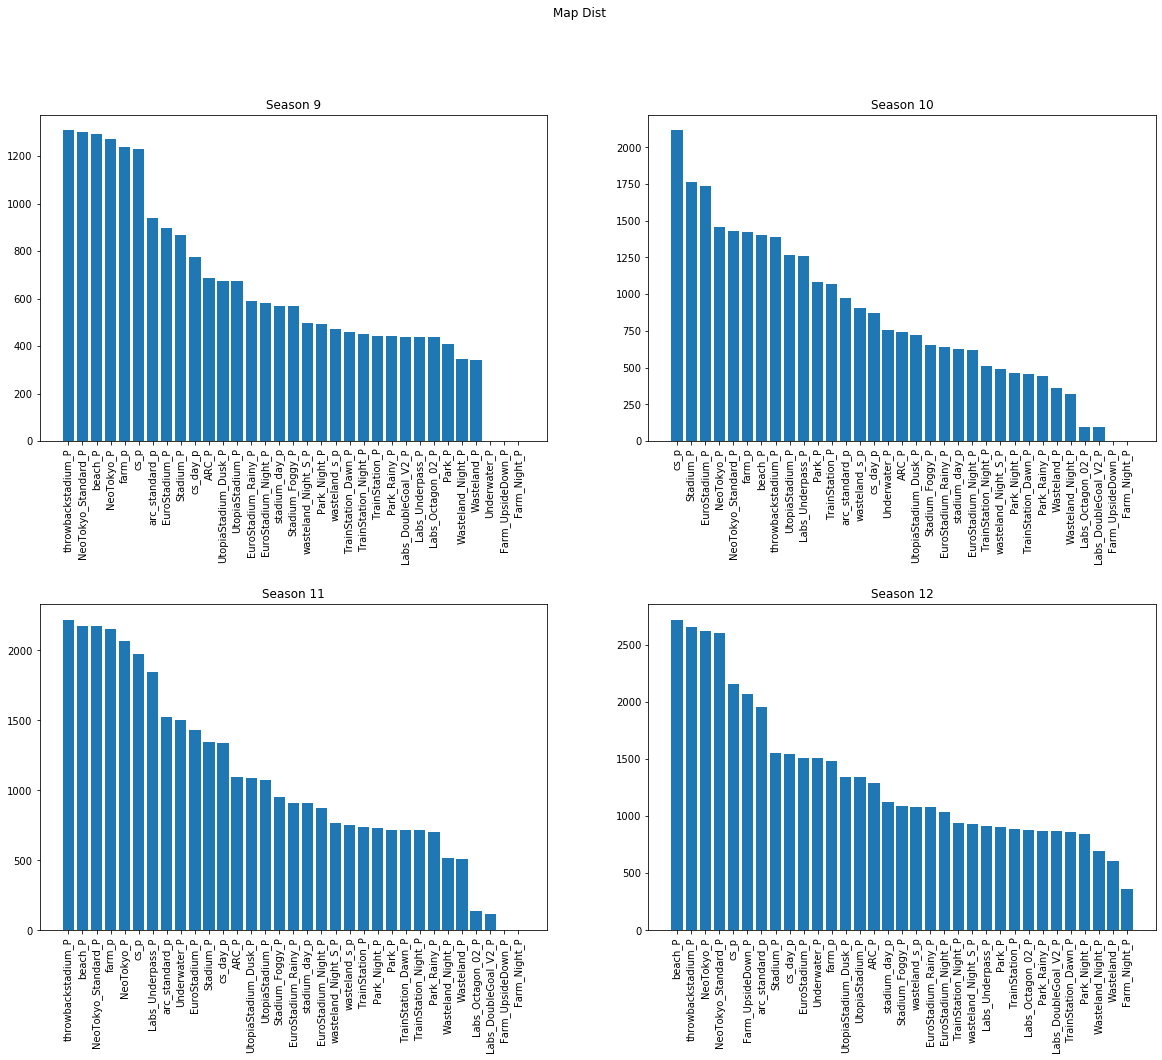

In [7]:
maps_df[[9, 'map_name']].sort_values(9, ascending=False)

fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Map Dist')
fig.subplots_adjust(hspace=0.5)

for i in range(9, 13):
    sorted_df = maps_df[[i, 'map_name']].sort_values(i, ascending=False)
    p = axs[math.floor((i - 9) / 2), (i - 9) % 2]
    p.set_title(f'Season {i}')
    p.bar(np.arange(len(sorted_df.index)), sorted_df[i])
    p.set_xticks(np.arange(len(sorted_df.index)))
    p.set_xticklabels(sorted_df['map_name'])
    for tick in p.get_xticklabels():
        tick.set_rotation(90)

fig.savefig('rumble_maps.jpg')

In [34]:
avg_df = pd.read_sql_query(sql='SELECT item, avg(wait_time) FROM item GROUP BY item', con=db.engine)
avg_df['name'] = item_names
avg_df

,item,avg(wait_time),name
0,1,6.617239,freeze
1,2,5.133895,grappling
2,3,5.866710,plunger
3,4,6.956262,haymaker
4,5,9.619447,spikes
5,6,2.594268,disruptor
6,7,4.841953,boot
7,8,6.182670,magnet
8,9,5.759943,power
9,10,3.508390,swapper


In [8]:
per_rank_df = pd.read_sql_query(sql='SELECT item, avg_rank, avg(wait_time), count(*) FROM item INNER JOIN items_extracted ON item.parent_id = items_extracted.id WHERE avg_rank IS NOT NULL AND wait_time IS NOT NULL GROUP BY avg_rank, item', con=db.engine)
per_rank_df

,item,avg_rank,avg(wait_time),count(*)
0,1,1,3.665286,49
1,2,1,5.018478,45
2,3,1,5.087844,58
3,4,1,5.127948,57
4,5,1,7.221083,45
...,...,...,...,...
204,7,19,5.383533,22700
205,8,19,7.028452,21320
206,9,19,6.407247,21489
207,10,19,3.636300,22894


In [9]:
per_rank_avg_df = pd.pivot_table(per_rank_df, values='avg(wait_time)', index='item', columns='avg_rank')
per_rank_avg_df

avg_rank,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
item,,,,,,,,,,,,,,,,,,,
1,3.665286,4.409386,4.625228,4.415649,4.564155,4.834516,4.935733,5.167859,5.584931,5.712272,5.973636,6.080857,6.299905,6.428899,6.664193,6.888209,7.094930,7.336530,7.667751
2,5.018478,5.119557,4.044474,4.064995,4.146903,4.183103,4.287334,4.332307,4.298124,4.415766,4.580297,4.633394,4.767198,4.893008,5.086988,5.281252,5.551369,5.916095,6.379978
3,5.087844,4.840712,4.468377,4.486053,4.881710,4.993664,5.250739,5.233948,5.328592,5.482753,5.544414,5.611837,5.707580,5.787180,5.876822,5.951112,6.078687,6.230737,6.571879
4,5.127948,4.432661,4.990702,5.409492,5.464356,5.724268,5.848747,5.864349,5.990580,6.193677,6.355150,6.473408,6.668397,6.767571,6.976916,7.117994,7.371055,7.654188,8.126089
5,7.221083,6.560695,7.410454,7.178650,7.239362,7.890228,7.747687,8.271115,8.348137,8.619262,8.796081,9.000060,9.229626,9.423547,9.665531,9.923668,10.266213,10.480483,10.577335
6,4.234961,2.961175,2.605638,2.535215,2.626969,2.634898,2.609927,2.659958,2.620660,2.664069,2.654859,2.638509,2.625108,2.623777,2.617299,2.602927,2.546275,2.508056,2.418669
7,3.463358,4.240061,4.167483,4.102235,4.051121,4.062352,4.193701,4.177606,4.228553,4.333638,4.505906,4.523520,4.670470,4.744389,4.859350,4.959077,5.116574,5.243177,5.383533
8,4.930683,5.437283,4.512183,4.521641,4.434830,4.590319,4.653615,5.021136,5.155031,5.303902,5.502270,5.658240,5.855047,6.033622,6.214689,6.438281,6.715552,6.864691,7.028452
9,3.928794,4.600457,4.404012,4.475084,4.050525,4.503228,4.502977,4.718749,4.819690,4.974932,5.176357,5.322881,5.457630,5.587654,5.762271,5.975029,6.251940,6.408581,6.407247


In [10]:
per_rank_count_df = pd.pivot_table(per_rank_df, values='count(*)', index='item', columns='avg_rank')
per_rank_count_df

avg_rank,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
item,,,,,,,,,,,,,,,,,,,
1,49,115,377,861,1762,3969,5877,14443,20616,45157,53379,96768,90075,136439,128232,162595,139018,148271,22946
2,45,117,389,874,1715,3953,5779,14557,20710,45415,53667,96632,89978,136090,127605,161595,136879,146325,22250
3,58,110,363,806,1744,3803,5610,13923,20005,43910,52168,94263,87646,133631,124573,158414,135451,145721,22308
4,57,110,374,813,1664,3851,5673,14217,20245,44168,52399,94723,88035,134194,125234,159697,135678,146005,22178
5,45,99,345,748,1571,3431,5092,12644,18001,38935,46014,82647,76337,115290,106901,135743,114086,121741,18441
6,67,118,382,837,1792,3987,5859,14799,21043,46159,54886,98913,92304,140056,131406,168345,143290,154264,23683
7,51,109,372,823,1738,3850,5689,14249,20368,44528,52637,95136,88853,134569,126536,161218,137033,147033,22700
8,53,101,373,851,1692,3850,5596,14010,19880,43163,51259,92246,86006,129826,120800,153210,129921,139206,21320
9,53,114,393,825,1710,3806,5601,13928,19861,43328,51517,92413,85992,130103,121814,154706,130516,140205,21489


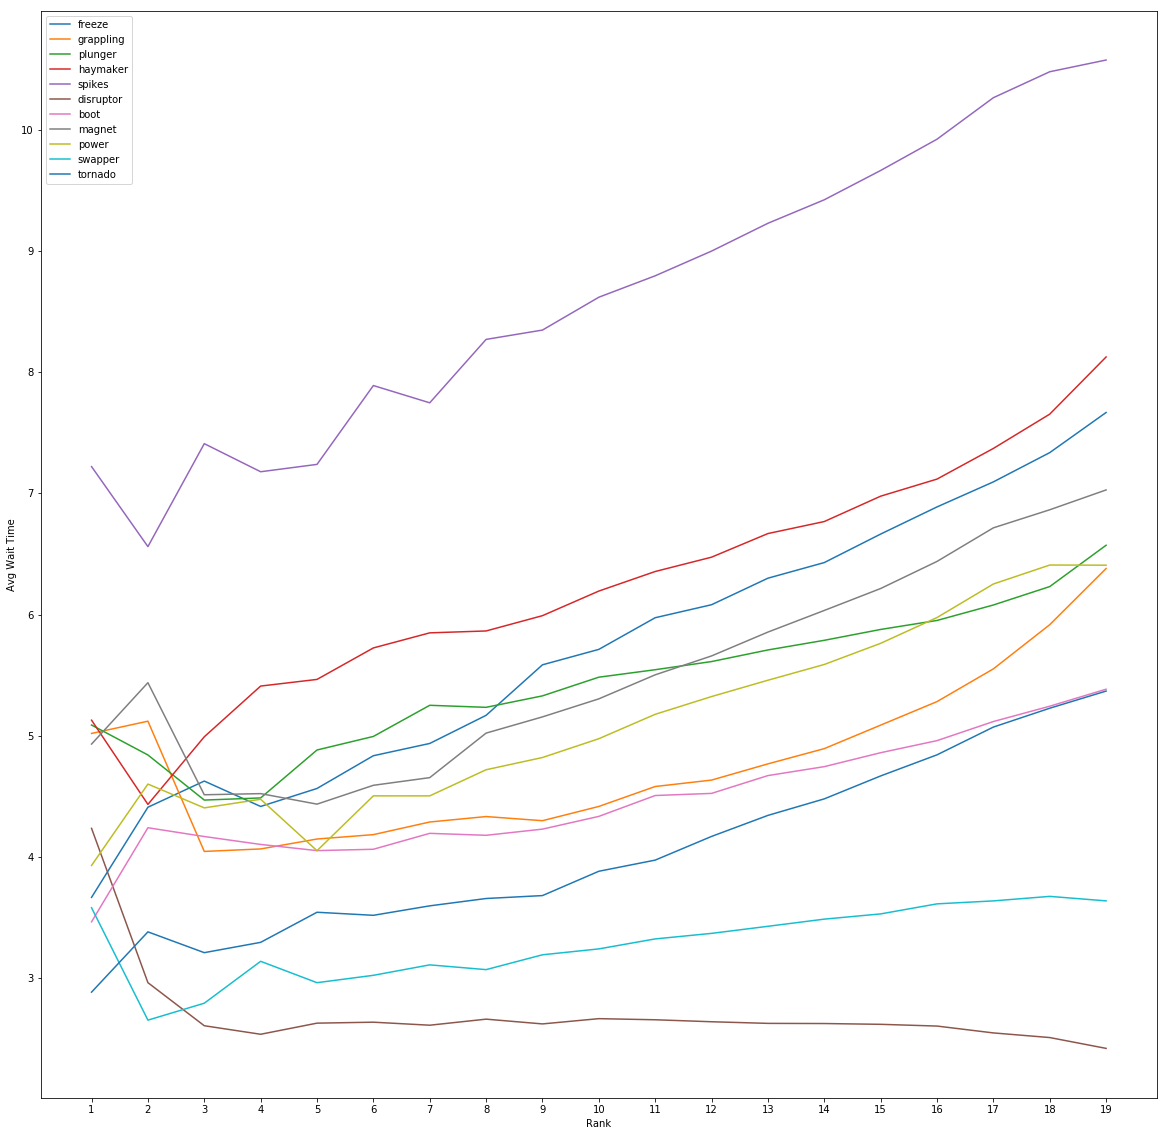

In [25]:
fig = plt.figure(figsize=(20,20))
plt.ylabel('Avg Wait Time')
plt.xlabel('Rank')
for i in range(0, 11):
    plt.plot(ranks, per_rank_avg_df.loc[i + 1], label=item_names[i])
plt.xticks(ranks)
plt.legend()
plt.show()

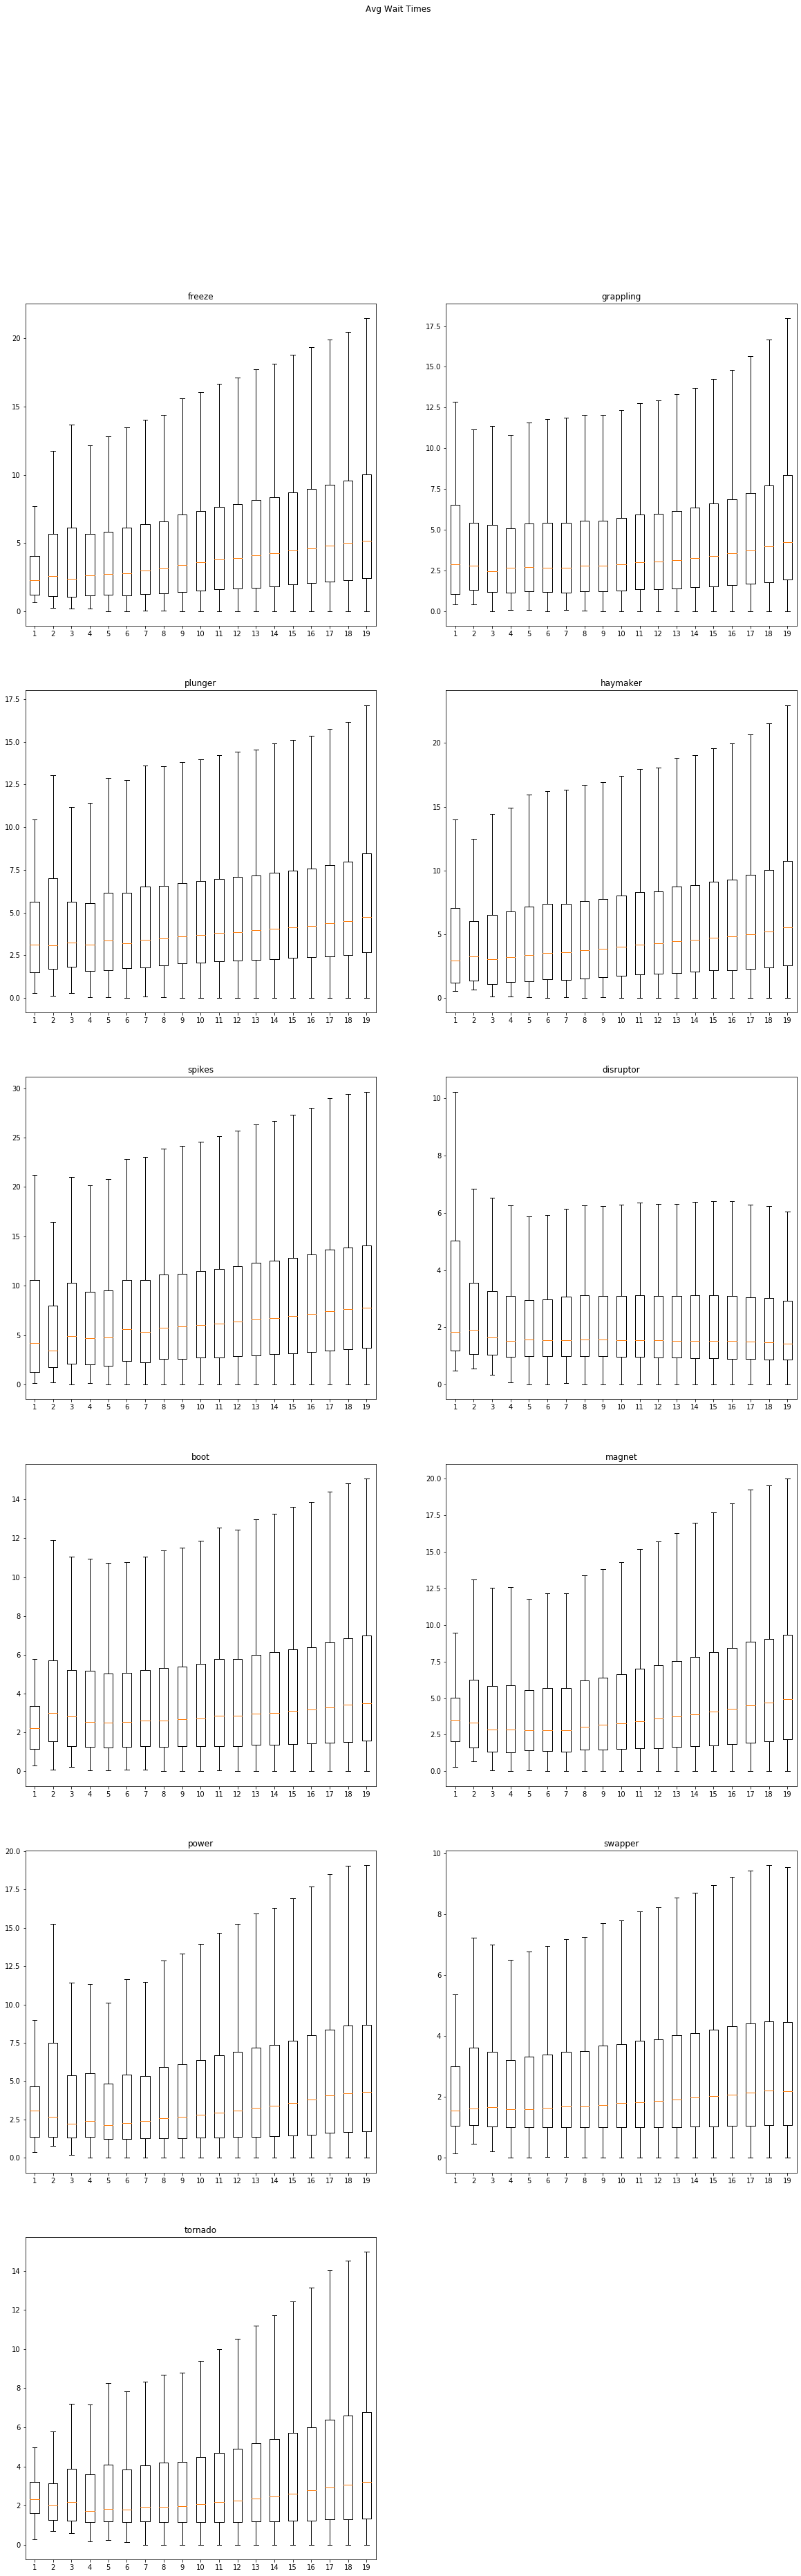

In [11]:
fig, axs = plt.subplots(6, 2, figsize=(20, 60))
fig.suptitle('Avg Wait Times')
fig.delaxes(axs[5][1])

for i in range(11):
    p = axs[math.floor(i / 2), i % 2]
    data_df = pd.read_sql_query(sql=f'SELECT avg_rank, wait_time FROM item INNER JOIN items_extracted ON item.parent_id = items_extracted.id WHERE avg_rank IS NOT NULL AND wait_time IS NOT NULL AND item = {i + 1}', con=db.engine)
    data_df = list(map(lambda x: list(data_df[data_df['avg_rank'] == x]['wait_time']), ranks))
    p.set_title(f'{item_names[i]}')
    p.boxplot(data_df, showfliers=False)
    p.set_xticks(ranks)
fig.savefig('rumble_wait.jpg')

In [72]:
def plot_heatmaps(item):
    heatmap_df = pd.read_sql_query(sql=f'SELECT avg_rank, use_x, use_y, use_z, is_orange, map FROM item INNER JOIN items_extracted ON item.parent_id = items_extracted.id WHERE avg_rank IS NOT NULL AND use_x IS NOT NULL AND item = {item}', con=db.engine)
    heatmap_df.loc[heatmap_df['is_orange'] == 1, 'use_y'] = -heatmap_df.loc[heatmap_df['is_orange'] == 1, 'use_y']
    heatmap_df.loc[heatmap_df['is_orange'] == 1, 'use_x'] = -heatmap_df.loc[heatmap_df['is_orange'] == 1, 'use_x']
    heatmap_df = heatmap_df[heatmap_df.apply(lambda x: maps[x['map']] in standard_maps, axis=1)]
    
    print(item_names[item -1])

    fig = plt.figure(figsize=(13 / 3 * 2, 6))
    plt.hist2d(heatmap_df['use_y'], heatmap_df['use_x'], bins=[np.arange(-6500, 6500, 50), np.arange(-4500, 4500, 50)], cmap=inferno_cmap, norm=LogNorm())
    plt.axis('off')
    plt.savefig(f'heatmap_{item}_topdown.png', bbox_inches='tight', pad_inches=0)
    plt.show()

    fig = plt.figure(figsize=(13 / 3 * 2, 2))
    plt.hist2d(heatmap_df['use_y'], heatmap_df['use_z'], bins=[np.arange(-6500, 6500, 50), np.arange(-500, 2500, 50)], cmap=inferno_cmap, norm=LogNorm())
    plt.axis('off')
    plt.savefig(f'heatmap_{item}_side.png', bbox_inches='tight', pad_inches=0)
    plt.show()

freeze


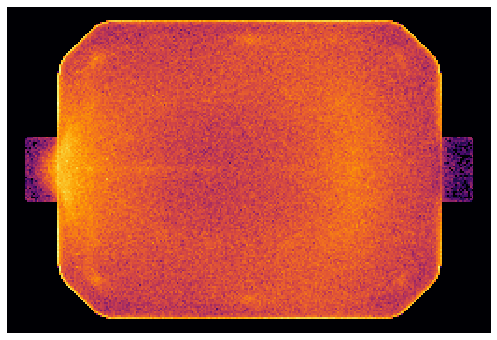

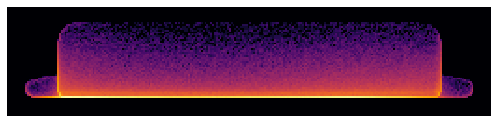

In [73]:
plot_heatmaps(1)

grappling


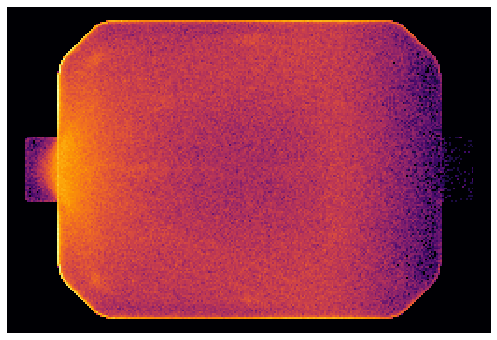

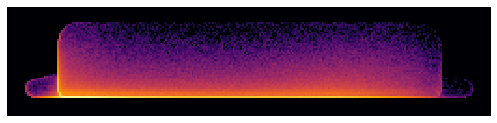

In [74]:
plot_heatmaps(2)

plunger


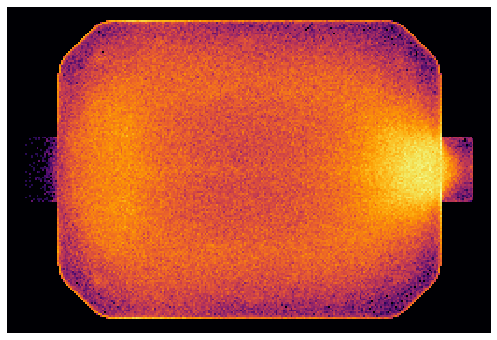

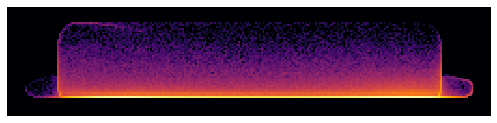

In [75]:
plot_heatmaps(3)

haymaker


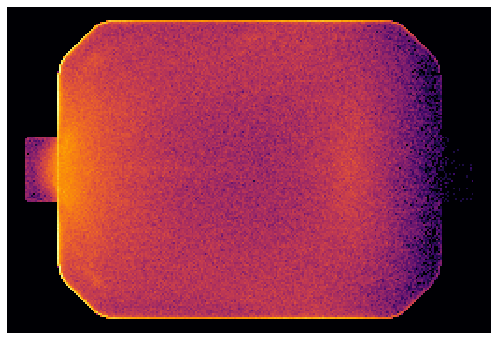

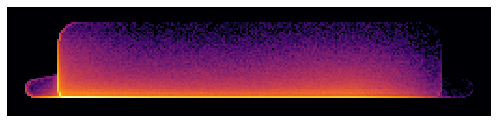

In [76]:
plot_heatmaps(4)

spikes


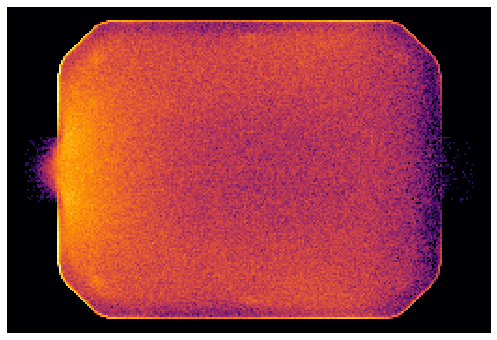

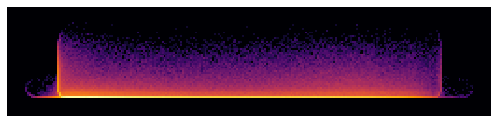

In [77]:
plot_heatmaps(5)

disruptor


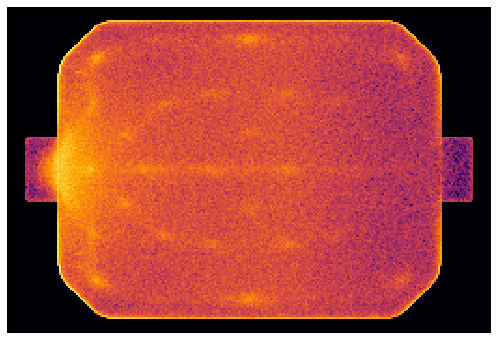

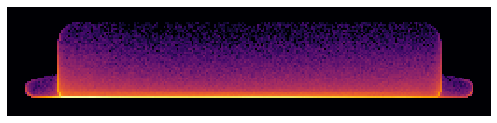

In [78]:
plot_heatmaps(6)

boot


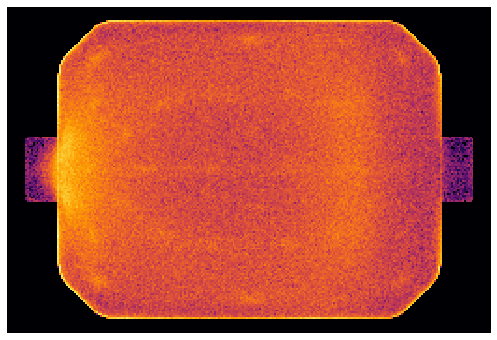

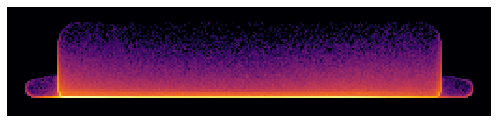

In [79]:
plot_heatmaps(7)

magnet


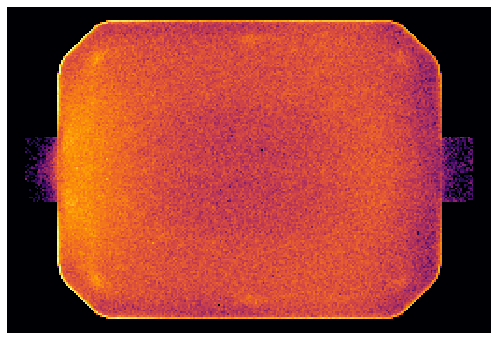

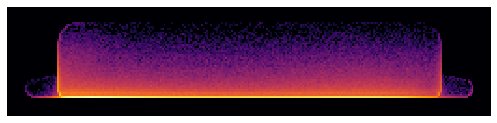

In [80]:
plot_heatmaps(8)

power


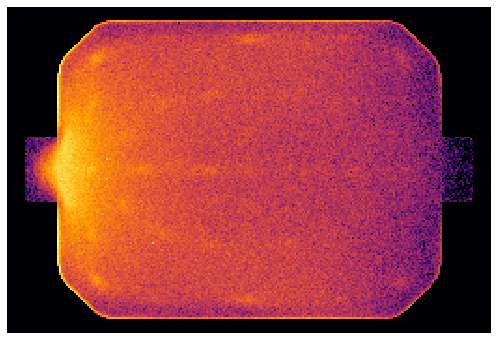

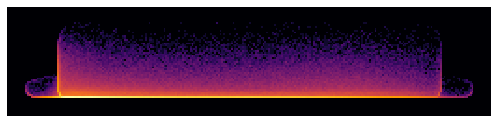

In [81]:
plot_heatmaps(9)

swapper


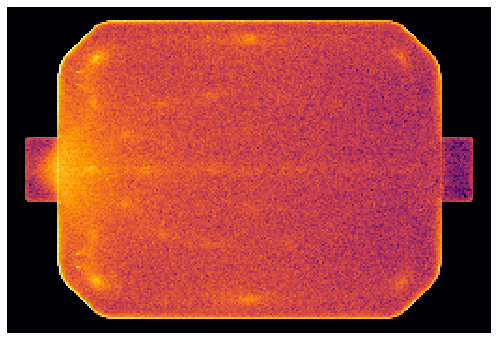

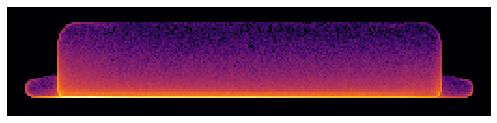

In [82]:
plot_heatmaps(10)

tornado


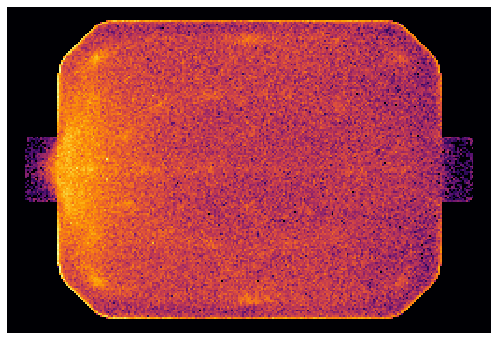

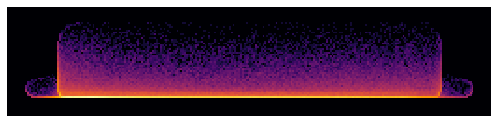

In [83]:
plot_heatmaps(11)

In [4]:
conn = sqlite3.connect('D:\\rumble_replays\\replays.sqlite', timeout=60)
cursor = conn.cursor()

cursor.execute(
    'SELECT parent_id, frame_get, item, is_orange FROM item WHERE is_kickoff = 1 ORDER BY parent_id, frame_get')

current_kickoff = [-1, -1]
kickoff_items = []
items_df = []


def get_max_dupes(items):
    d = dict()

    for i in items:
        if i in d:
            d[i] += 1
        else:
            d[i] = 1

    return max(d.values())


def handle_kickoff(items):
    if len(items) != 6:
        return

    o = list(map(lambda x: x[2], filter(lambda x: x[3] == 1, items)))
    b = list(map(lambda x: x[2], filter(lambda x: x[3] == 0, items)))

    items_df.append({
        'o': get_max_dupes(o),
        'b': get_max_dupes(b),
        'l': get_max_dupes(o + b)
    })


try:
    while True:
        row = cursor.fetchone()

        if current_kickoff[0] != row[0] or row[1] - current_kickoff[1] > 1:
            handle_kickoff(kickoff_items)
            current_kickoff[0] = row[0]
            current_kickoff[1] = row[1]

            kickoff_items.clear()

        kickoff_items.append(row)
except Exception as e:
    pass

items_df = pd.DataFrame(items_df, dtype='UInt8')
items_df

,o,b,l
0,2,1,2
1,2,2,3
2,1,1,1
3,1,1,2
4,1,1,1
...,...,...,...
897563,1,1,2
897564,1,1,2
897565,2,1,2
897566,1,1,2


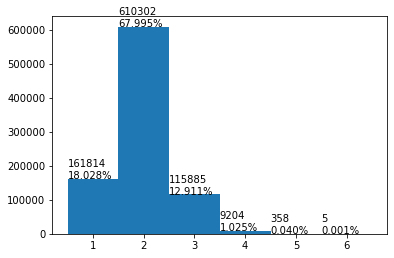

In [44]:
fig = plt.figure()
arr = plt.hist(items_df['l'], bins=np.arange(1, 7.5) - 0.5)
for i in range(6):
    plt.text(arr[1][i], arr[0][i], '{}\n{:.3%}'.format(str(int(arr[0][i])), arr[0][i] / len(items_df)))
plt.show()


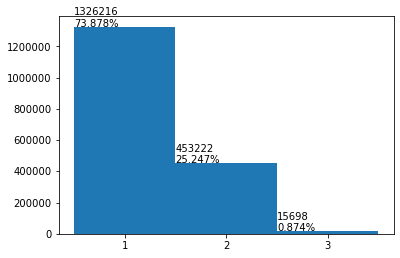

In [46]:
fig = plt.figure()
arr = plt.hist(pd.concat([items_df['o'], items_df['b']], ignore_index=True), bins=np.arange(1, 4.5) - 0.5)
for i in range(3):
    plt.text(arr[1][i], arr[0][i], '{}\n{:.3%}'.format(str(int(arr[0][i])), arr[0][i] / (len(items_df) * 2)))
plt.xticks([1, 2, 3])
plt.show()

In [3]:
pre_item_goals_df = pd.read_sql_query(sql='SELECT pre_item, avg_rank, count(*) FROM goal INNER JOIN items_extracted ON goal.parent_id = items_extracted.id WHERE avg_rank IS NOT NULL GROUP BY avg_rank, pre_item', con=db.engine)
pre_item_goals_df = pd.pivot_table(pre_item_goals_df, values='count(*)', index='avg_rank', columns='pre_item', fill_value=0)
pre_item_goals_df

pre_item,0,1
avg_rank,,
1,52,12
2,90,21
3,327,81
4,701,167
5,1497,307
6,3121,633
7,4681,825
8,11307,1997
9,16332,2763


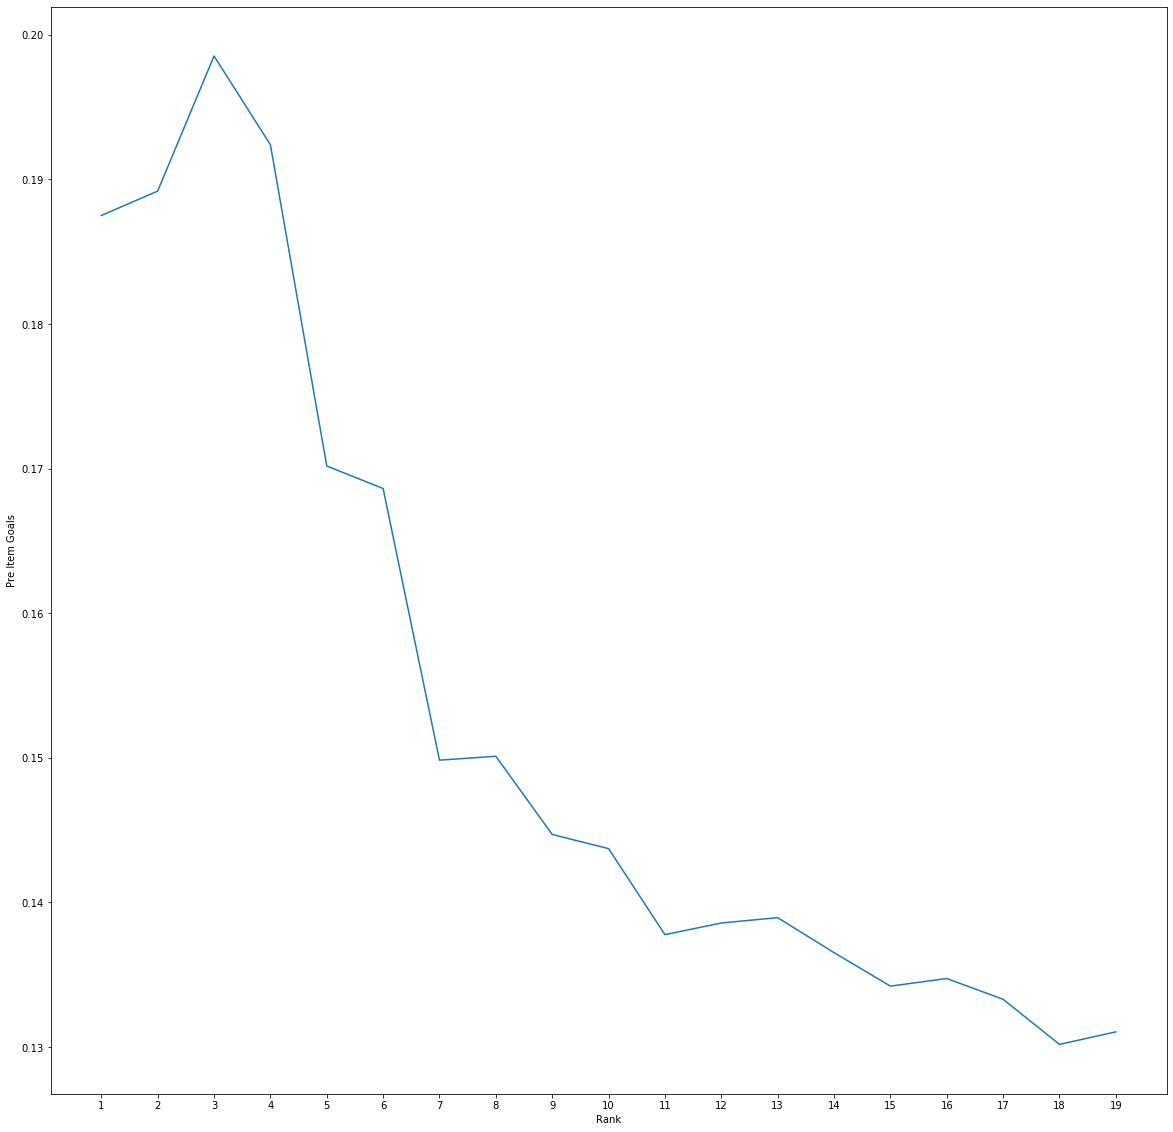

In [57]:
pre_item_percent = pre_item_goals_df[1] / (pre_item_goals_df[0] + pre_item_goals_df[1])

fig = plt.figure(figsize=(20,20))
plt.ylabel('Pre Item Goals')
plt.xlabel('Rank')
plt.plot(ranks, pre_item_percent)
plt.xticks(ranks)

plt.show()

In [4]:
item_goals_df = pd.read_sql_query(sql='SELECT item, avg_rank, count(*) FROM goal INNER JOIN items_extracted ON goal.parent_id = items_extracted.id WHERE avg_rank IS NOT NULL GROUP BY avg_rank, item', con=db.engine)
item_goals_df = pd.pivot_table(item_goals_df, values='count(*)', index='avg_rank', columns='item', fill_value=0)
item_goals_df['total'] = item_goals_df.sum(axis=1)
item_goals_df

item,-1,1,2,3,4,5,6,7,8,9,10,11,total
avg_rank,,,,,,,,,,,,,
1,36,0,2,5,4,9,0,0,4,4,0,0,64
2,52,3,5,12,8,12,2,3,9,5,0,0,111
3,195,6,15,37,34,69,9,2,22,16,1,2,408
4,395,19,38,85,78,116,11,10,70,36,3,7,868
5,806,32,80,191,166,272,21,11,131,64,12,18,1804
6,1603,74,188,416,393,506,49,41,282,162,12,28,3754
7,2378,86,252,672,558,754,80,44,398,226,28,30,5506
8,5498,231,643,1593,1454,1926,190,121,963,544,66,75,13304
9,7568,298,838,2588,2056,2828,276,208,1475,756,83,121,19095


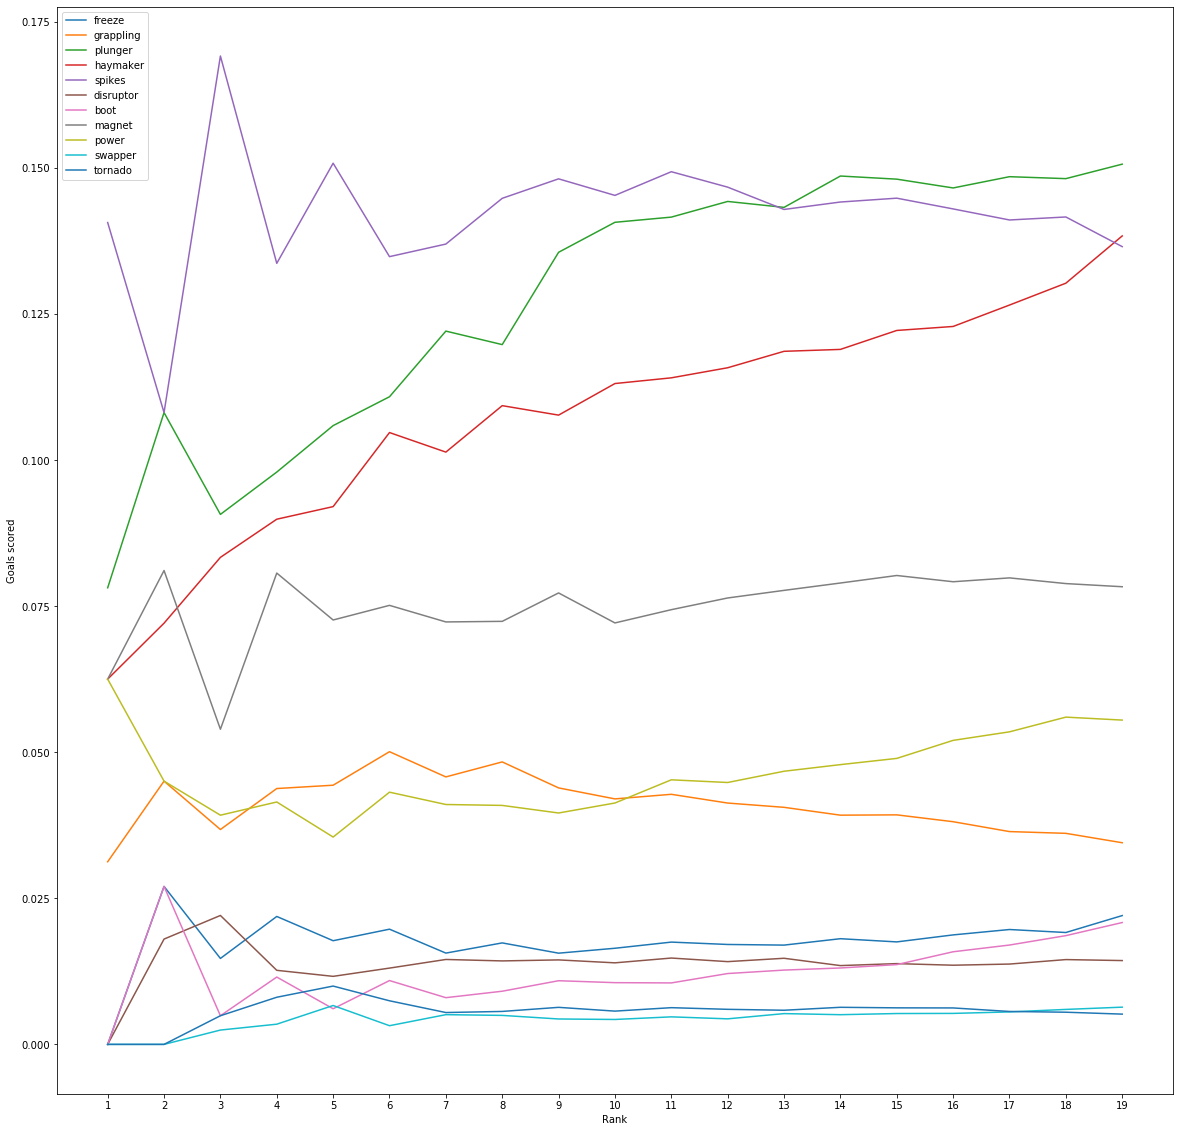

In [66]:
fig = plt.figure(figsize=(20,20))
plt.ylabel('Goals scored')
plt.xlabel('Rank')
for i in range(0, 11):
    plt.plot(ranks, item_goals_df[i + 1] / item_goals_df['total'], label=item_names[i])
plt.xticks(ranks)
plt.legend()
plt.show()

In [8]:
pre_item_goals_df

pre_item,0,1
avg_rank,,
1,52,12
2,90,21
3,327,81
4,701,167
5,1497,307
6,3121,633
7,4681,825
8,11307,1997
9,16332,2763


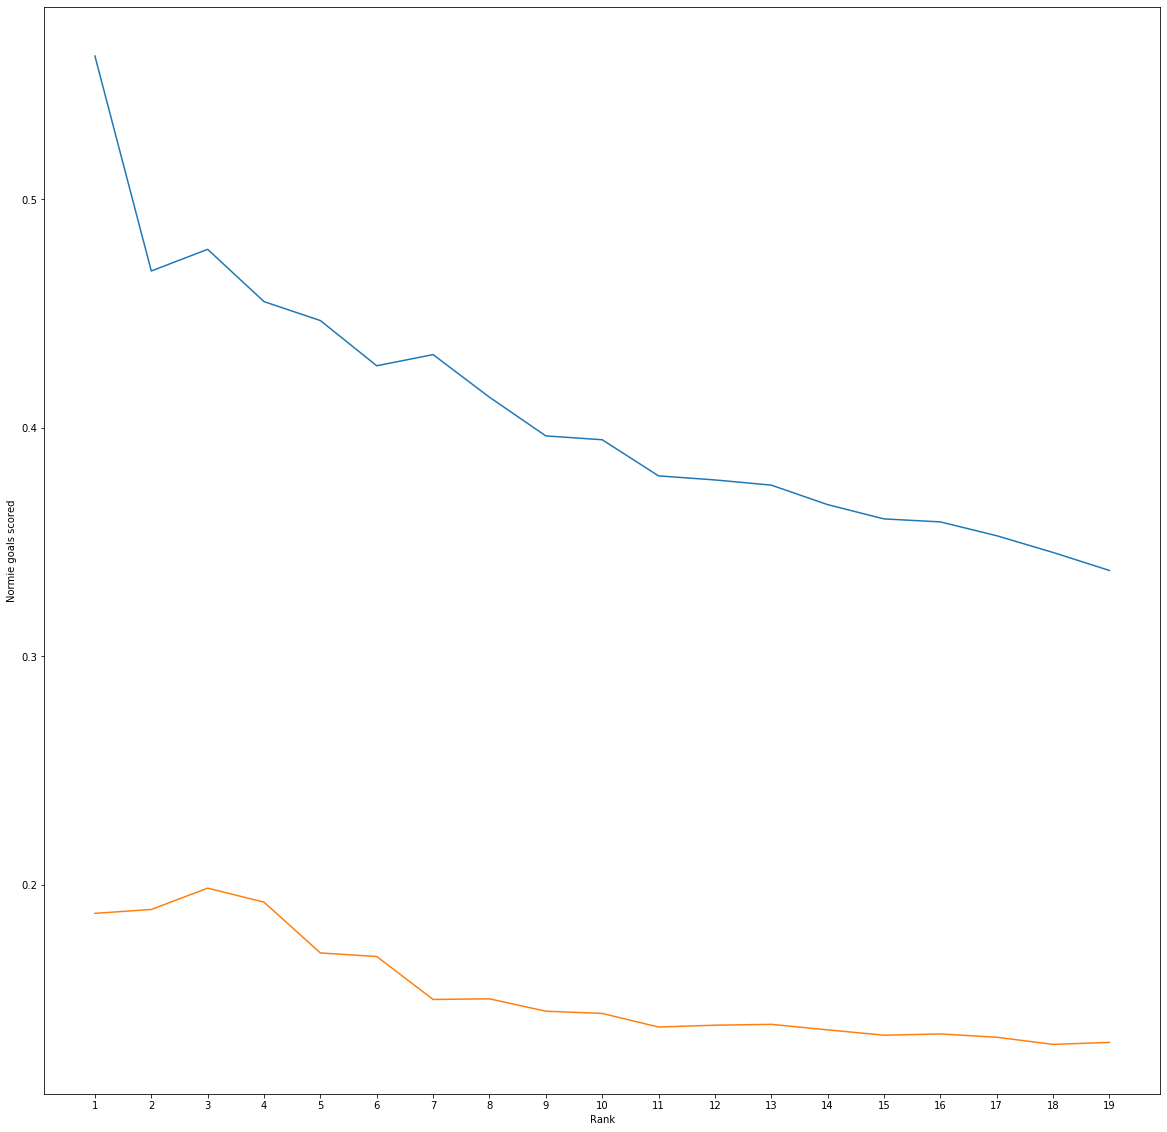

In [68]:
fig = plt.figure(figsize=(20,20))
plt.ylabel('Normie goals scored')
plt.xlabel('Rank')
plt.plot(ranks, item_goals_df[-1] / item_goals_df['total'])
plt.plot(ranks, pre_item_percent)
plt.xticks(ranks)
plt.show()

In [12]:
per_rank_edge_df = pd.read_sql_query(sql='SELECT item, avg_rank, orange_winner, is_orange, count(*) FROM item INNER JOIN items_extracted ON item.parent_id = items_extracted.id WHERE avg_rank IS NOT NULL AND orange_winner IS NOT NULL GROUP BY avg_rank, item, orange_winner, is_orange', con=db.engine)
per_rank_edge_df['winner'] = per_rank_edge_df['orange_winner'] == per_rank_edge_df['is_orange']
per_rank_edge_df.drop('orange_winner', axis=1, inplace=True)
per_rank_edge_df.drop('is_orange', axis=1, inplace=True)
per_rank_edge_df = per_rank_edge_df.groupby(['item', 'avg_rank', 'winner']).sum()
per_rank_edge_df

count(*)
item avg_rank winner          
1    1        False         28
              True          33
     2        False         62
              True          66
     3        False        209
...                        ...
11   17       True       38391
     18       False      42045
              True       41532
     19       False       6404
              True        6471

[418 rows x 1 columns]

In [13]:
temp = []
for i in range(1, 12):
    for j in range(1, 20):
        temp.append({
            'item': i,
            'avg_rank': j,
            'edge': (per_rank_edge_df.loc[i, j, True][0].item() - 
                     per_rank_edge_df.loc[i, j, False][0].item()) / 
                    (per_rank_edge_df.loc[i, j, True][0].item() +
                     per_rank_edge_df.loc[i, j, False][0].item())
        })
edge_df = pd.DataFrame(temp)
edge_df

,item,avg_rank,edge
0,1,1,0.081967
1,1,2,0.031250
2,1,3,0.007126
3,1,4,-0.005203
4,1,5,0.015728
...,...,...,...
204,11,15,-0.003956
205,11,16,-0.004675
206,11,17,-0.008804
207,11,18,-0.006138


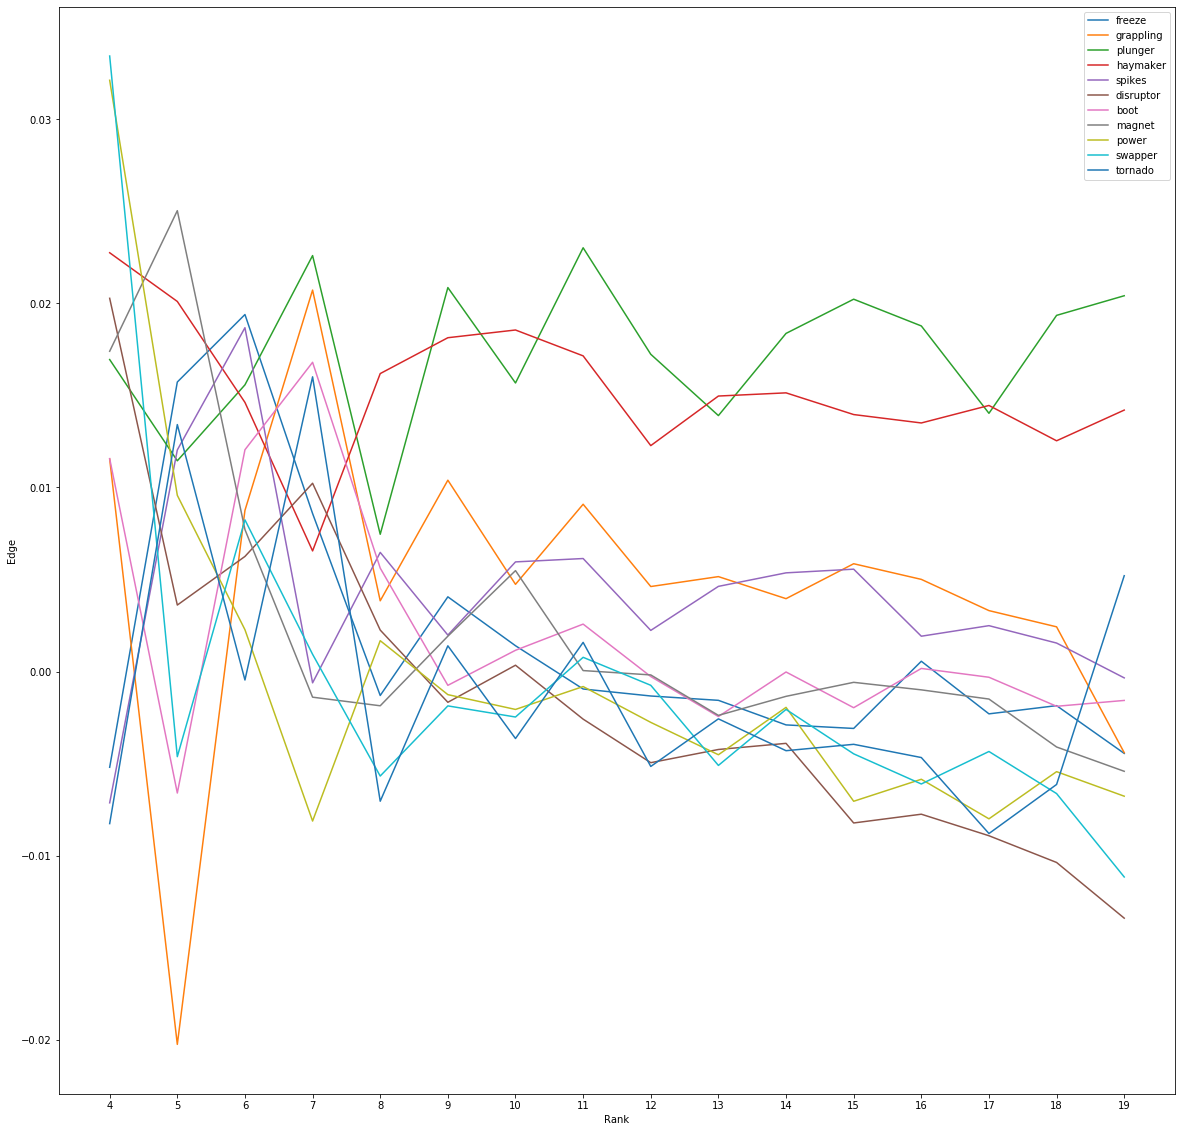

In [14]:
fig = plt.figure(figsize=(20,20))
plt.ylabel('Edge')
plt.xlabel('Rank')
for i in range(0, 11):
    plt.plot(ranks[3:], edge_df.loc[edge_df['item'] == (i + 1), 'edge'][3:], label=item_names[i])
plt.xticks(ranks[3:])
plt.legend()
plt.show()
fig.savefig('rumble_edge.jpg')